# Aula 09

Nas aulas passadas começamos a trabalhar com o dataset do Titanic, fizemos a etapa de processamento e começamos a estudar as estatísticas descritivas do conjunto de dados.

In [1]:
import pandas as pd
import requests
from io import StringIO
import re

# Criação do dataFrame dos alunos
# ID do arquivo no Google Drive
file_id = '1S5Nl793vcL5ZPTGjzKaIEbwbLaDplvIP'

# URL modificada para forçar o download do arquivo
url = f"https://drive.google.com/uc?id={file_id}"

# Tentando obter o arquivo com requests
try:
    response = requests.get(url)
    response.raise_for_status()  # Lança um erro para respostas não-sucedidas
    # Usando StringIO para converter o texto em um arquivo em memória e, então, lendo com o Pandas
    csv_raw = StringIO(response.text)
    data = pd.read_csv(csv_raw)
except requests.RequestException as e:
    print(f"Erro ao acessar o arquivo: {e}")


#Transformando o PassengerId no índice
data = data.set_index("PassengerId")

#Criando uma função que encontra os pronomes de tratamentos dos passageiros
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

#Aplicando a função na coluna de nomes, isto é, criando uma coluna só com os pronomes de tratamentos
data['Title'] = data['Name'].apply(extract_title)

#Substituindo os valores ausentes das idades pela mediana agrupada por sexo e classe de passageiro
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

#Substituindo os valores ausentes do porto de embarque pelo valor que mais apareceu
data['Embarked'] = data['Embarked'].fillna('S')

#Substituindo os valores ausentes da cabine com base na Classe e no mapa do navio
for num in [1, 2, 3]:
    if num == 1:
        data.loc[data['Pclass'] == 1, 'Cabin'] = data.loc[data['Pclass'] == 1, 'Cabin'].fillna('ABC')
    elif num == 2:
        data.loc[data['Pclass'] == 2, 'Cabin'] = data.loc[data['Pclass'] == 2, 'Cabin'].fillna('DE')
    elif num == 3:
        data.loc[data['Pclass'] == 3, 'Cabin'] = data.loc[data['Pclass'] == 3, 'Cabin'].fillna('FG')


In [2]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,FG,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,FG,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,FG,S,Mr



| Nome da Variável | Descrição                               |
|------------------|-----------------------------------------|
| Survived         | Sobreviveu (1) ou morreu (0)            |
| Pclass           | Classe do passageiro (1 = Upper Class, 2 = Middle Class, 3 = Lower Class) |
| Name             | Nome do passageiro                      |
| Sex              | Sexo do passageiro                      |
| Age              | Idade do passageiro                     |
| SibSp            | Número de irmãos/cônjuges a bordo       |
| Parch            | Número de pais/filhos a bordo           |
| Ticket           | Número do bilhete                       |
| Fare             | Tarifa                                  |
| Cabin            | Cabine                                  |
| Embarked         | Porto de embarque C = Cherbourg, Q = Queenstown, S = Southampton|

In [3]:
import pandas as pd
import seaborn as sns

nums = ["Survived","Pclass","Age","SibSp","Parch","Fare"]

data[nums].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


Para transformar as colunas categóricas 'Sex', 'Cabin', e 'Title' em números usando LabelEncoder do pacote sklearn, você pode seguir os passos abaixo.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Colunas a serem transformadas
columns_to_encode = ['Sex', 'Cabin', 'Title']

# Aplicando LabelEncoder às colunas categóricas
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Mostrando o DataFrame transformado
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,S,12
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,82,C,13
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,S,9
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,56,S,13
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,S,12


In [6]:
vars = ["Survived","Pclass","Age","SibSp","Parch","Fare", 'Sex', 'Cabin', 'Title']

data[vars].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Title
Survived,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307,-0.543351,-0.260159,-0.201345
Pclass,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500,0.131900,0.860976,0.045541
Age,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692,0.102706,-0.372761,0.284627
SibSp,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651,-0.114631,0.091023,-0.191786
Parch,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225,-0.245489,0.034992,-0.119721
Fare,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000,-0.182333,-0.527777,-0.086359
Sex,-0.543351,0.131900,0.102706,-0.114631,-0.245489,-0.182333,1.000000,0.085398,0.256407
Cabin,-0.260159,0.860976,-0.372761,0.091023,0.034992,-0.527777,0.085398,1.000000,0.089947
Title,-0.201345,0.045541,0.284627,-0.191786,-0.119721,-0.086359,0.256407,0.089947,1.000000


Para visualizarmos a matriz de correlação, vamos utilizar a função .heatmap() do pacote seaborn, essa função vai nos retornar uma forma gráfica da matriz com uma escala de cor em conjunto com uma escala numérica, as quais vão indicar o grau medido entre as variáveis.

<Axes: >

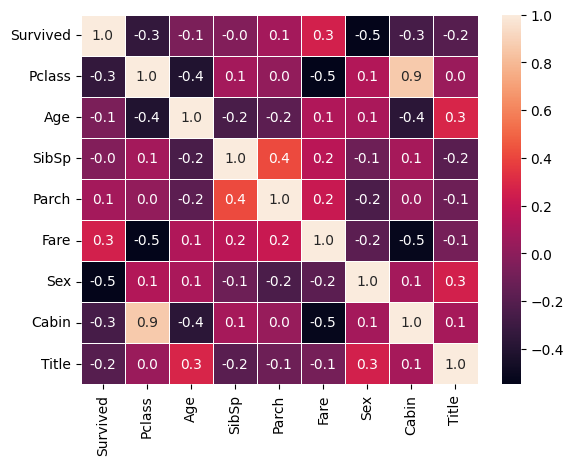

In [7]:
correlation = data[vars].corr()


# plot da matriz de correlação

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

Esta matriz permite interpretar a relação entre variáveis, exibindo uma escala de cores que varia de laranja a vermelho e roxo, e uma escala numérica de 1 a -1. Além da barra lateral que mostra a escala numérica e as cores, cada quadrante exibe o valor e a cor correspondente à relação. As variáveis com correlação forte estão na faixa de 1 a 0,7 (positivas ou negativas), em tonalidade laranja para positivas e roxo escuro para negativas. Variáveis com correlação moderada estão entre 0,7 e 0,5, em tonalidade avermelhada para positivas e roxo médio para negativas. Variáveis com baixa correlação estão entre 0,5 e 0,25, e aquelas com coeficiente próximo a 0, em vermelho, têm correlação quase nula.